<a href="https://colab.research.google.com/github/SeBorromeo/DS3001-kmc/blob/main/assignment_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 18
Receiving objects: 100% (25/25), 5.04 MiB | 9.31 MiB/s, done.
Resolving deltas: 100% (4/4), done.


## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./kmc/data/airbnb_hw.csv')

In [8]:
columns = ['Price','Beds','Number Of Reviews','Review Scores Rating']
df = df[columns]

print(df.isna().sum())
print('Shape: ', df.shape)

Price                      0
Beds                      85
Number Of Reviews          0
Review Scores Rating    8323
dtype: int64
Shape:  (30478, 4)


In [9]:
df.describe()

,Beds,Number Of Reviews,Review Scores Rating
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [13]:
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'])
df.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [14]:
df = df.dropna()

print(df.isna().sum())
print('Shape: ', df.shape)
df.describe()

Price                   0
Beds                    0
Number Of Reviews       0
Review Scores Rating    0
dtype: int64
Shape:  (22111, 4)


,Price,Beds,Number Of Reviews,Review Scores Rating
count,22111.000000,22111.000000,22111.000000,22111.000000
mean,154.798697,1.558093,16.523179,91.991633
std,148.901275,1.044014,24.322185,8.851965
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,3.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [15]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

In [24]:
y = df['Price']
X = df.loc[:,['Beds','Number Of Reviews','Review Scores Rating']]
X = X.apply(maxmin)

In [25]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(X)
X['g_hat'] = model.predict(X)

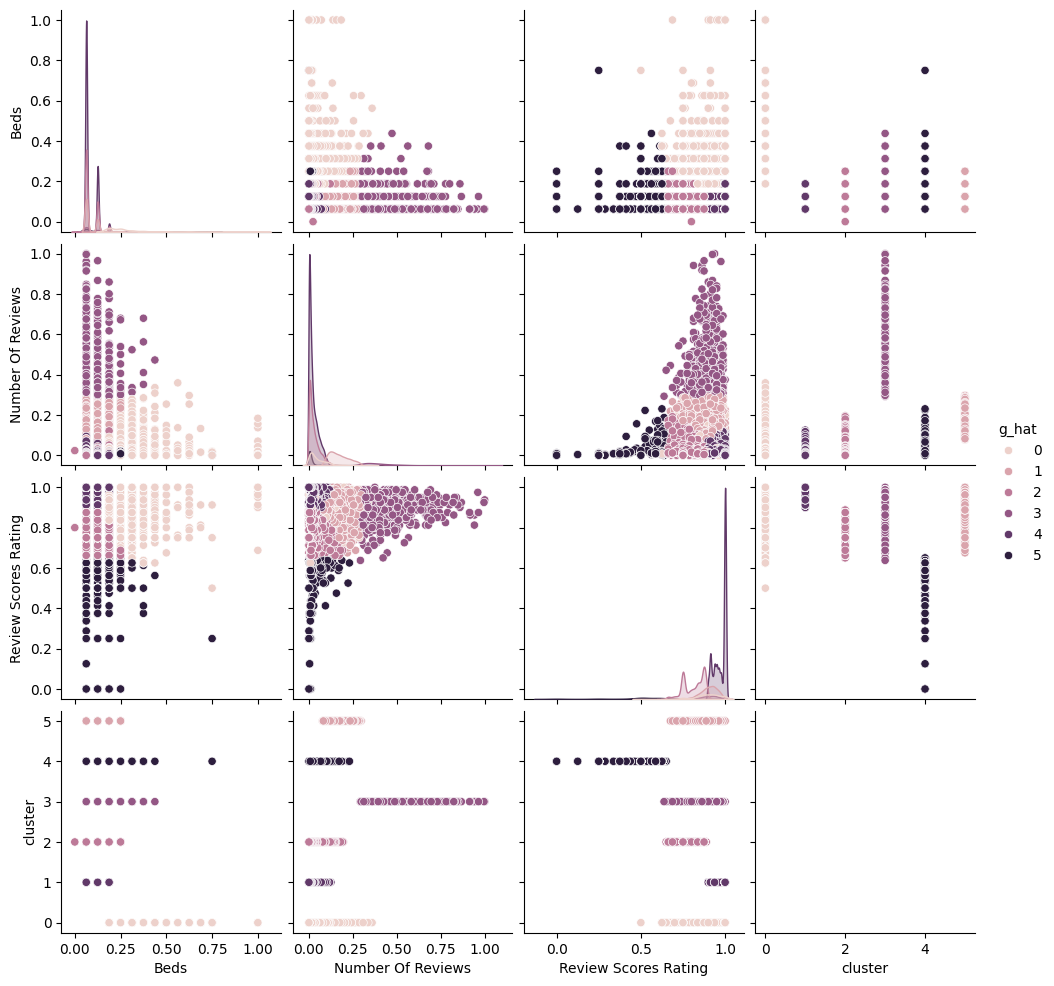

In [21]:
import seaborn as sns

sns.pairplot(data=X,hue='g_hat')

In [26]:
df['g_hat'] = model.labels_
df.loc[:,['Price','g_hat'] ].groupby('g_hat').describe()

Price                                                             
         count        mean         std   min     25%    50%    75%      max
g_hat                                                                      
0       1627.0  293.440688  262.877909  27.0  150.00  229.0  350.0   4500.0
1      10491.0  152.199600  147.277659  10.0   85.00  130.0  190.0  10000.0
2       5547.0  131.671174  102.821180  20.0   75.00  110.0  169.0   5000.0
3        793.0  133.311475   83.104413  27.0   80.00  110.0  169.0    875.0
4        631.0  133.561014  215.675540  25.0   65.00   99.0  152.5   5000.0
5       3022.0  141.703177   84.214663  22.0   87.25  125.0  175.0   1000.0

5. The Group that appears to have the highest retail price on average is g_hat 0, the first group as shown in the table above. It has a mean of 293 while the second highest has a mean of 152.

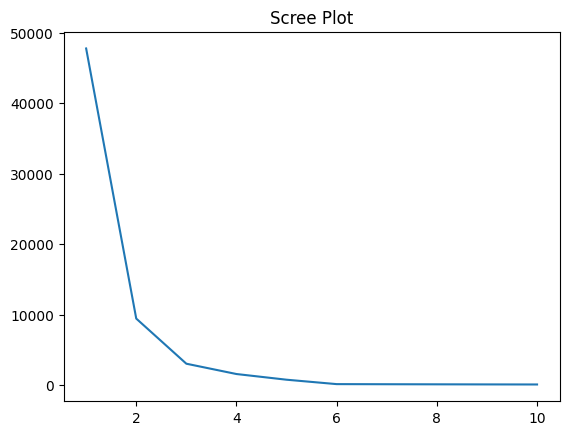

In [27]:
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

The plot appears to flatten out at k=3

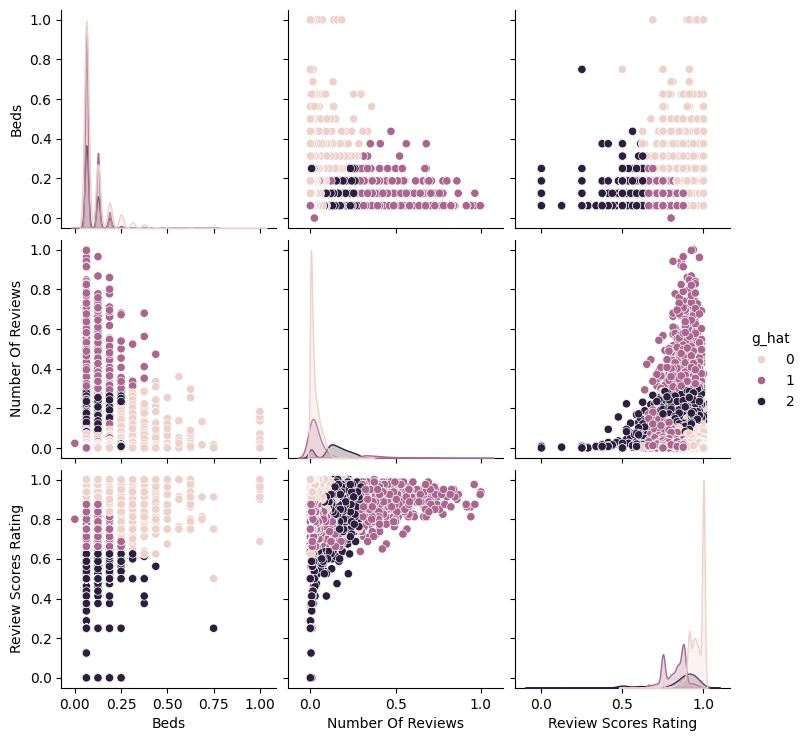

In [30]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(X)
X['g_hat'] = model.predict(X)

sns.pairplot(data=X,hue='g_hat')

In [31]:
df['g_hat'] = model.labels_
df.loc[:,['Price','g_hat'] ].groupby('g_hat').describe()

Price                                                           
         count        mean         std   min   25%    50%    75%      max
g_hat                                                                    
0      12118.0  171.163063  174.271314  10.0  90.0  140.0  200.0  10000.0
1       6340.0  131.876341  100.562454  20.0  75.0  110.0  169.0   5000.0
2       3653.0  140.296742  117.900712  22.0  80.0  120.0  175.0   5000.0

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [32]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

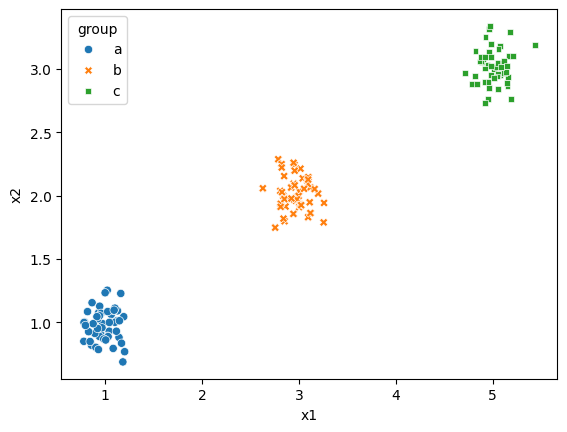

In [33]:
sns.scatterplot(data = df0_125, x ='x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

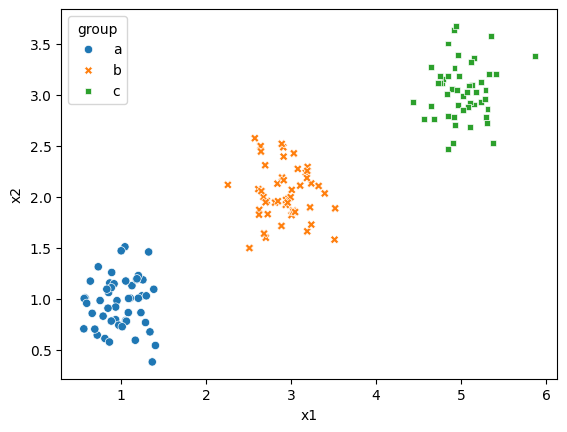

In [34]:
sns.scatterplot(data = df0_25, x ='x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

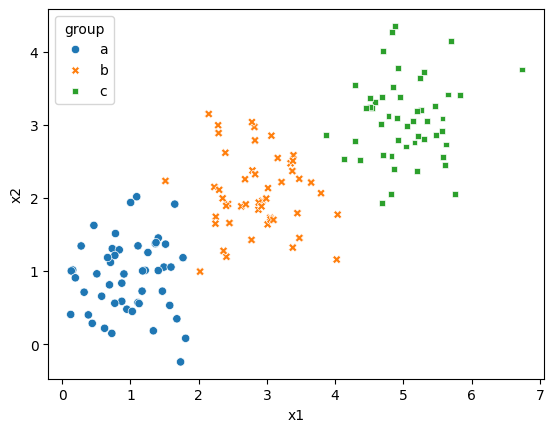

In [35]:
sns.scatterplot(data = df0_5, x ='x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

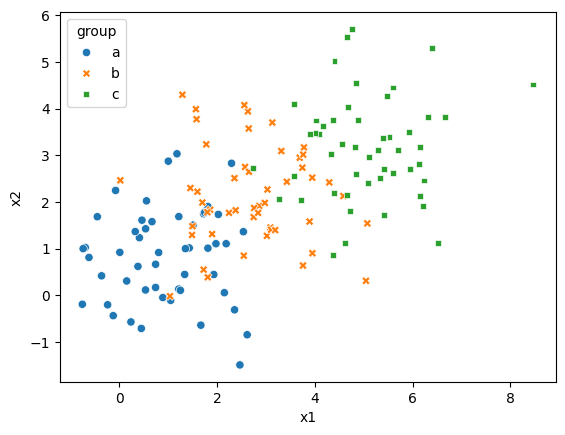

In [36]:
sns.scatterplot(data = df1_0, x ='x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

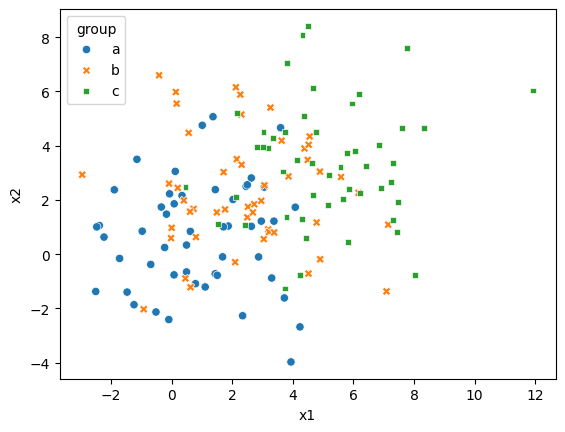

In [37]:
sns.scatterplot(data = df2_0, x ='x1', y='x2', hue='group', style='group')

2. As the noise goes up, the groups blend more and more to the point where there original groupings are indistinguishable if we removed the colors. We begin to see the groups overlap with a noise value of 0.5 and above.

In [45]:
def screeplot(df):
  X = df.loc[:,['x1','x2']]
  X = X.apply(maxmin)

  k_bar = 10
  k_grid = np.arange(1,k_bar+1) # The range of k's to consider
  SSE = np.zeros(k_bar) # We'll store the training error here
  for k in range(k_bar): # For indices from 0 to k_bar-1
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
      model = model.fit(X) # Fit the emodel
      SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
  scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

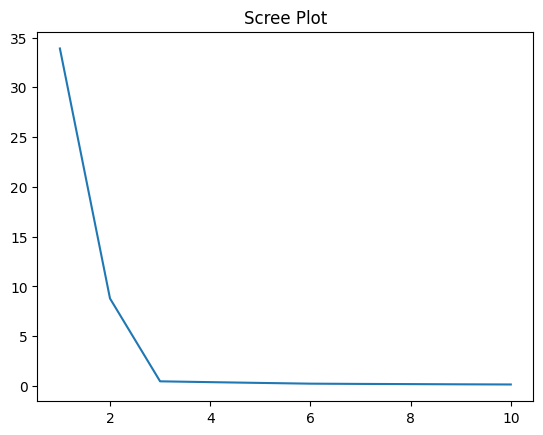

In [46]:
screeplot(df0_125)

elbow at k = 3

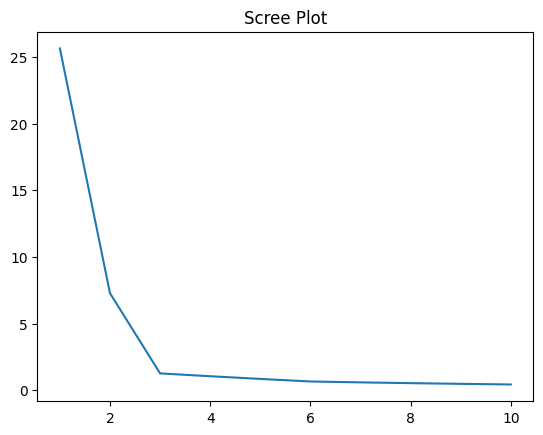

In [47]:
screeplot(df0_25)

elbow at k = 3

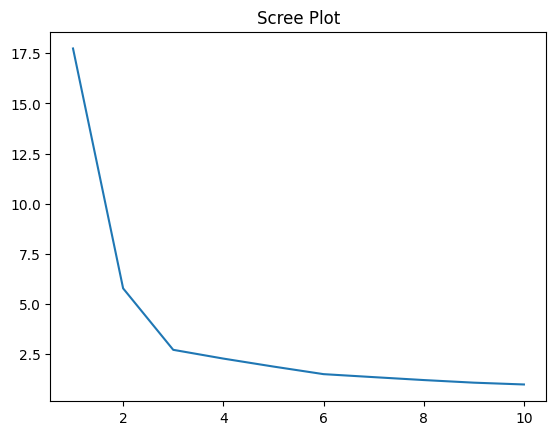

In [48]:
screeplot(df0_5)

elbow at k =3

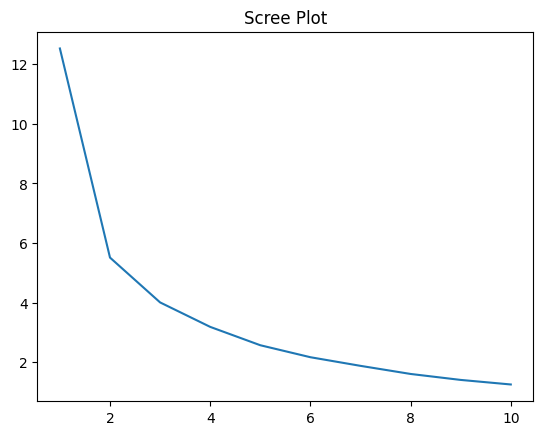

In [49]:
screeplot(df1_0)

No obvious elbow

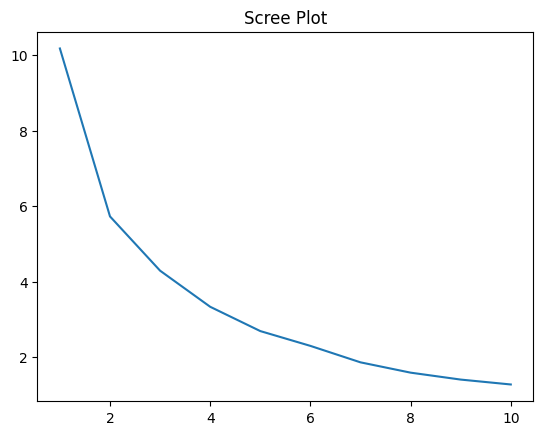

In [50]:
screeplot(df2_0)

No obvious elbow

3. Similar to what we saw before with the graphs, in the scree plots we have a more distinguishable seperation, in this case where the elbow is. As the noise increases, we see the slope get gentler and gentler until there is no clear elbow anymore

4. The elbow method, while not a quantitative measure, works not because its the "sufficiently low value" like an SSE or p-value but because it visually shows if adding on another group has a significant drop off in SSE "proving" that this certain number of groups and seperation fits the data much better once we've added another group (gotten to one more value of k). We see this with the data as the three very distinct groups slowly start to blend closer and closer together which each graph. In the first three Scree plots, we are able to distinguish a "drop off point" or elbow which makes sense when we align them with their respective graphs. In these first three, you can still draw a shape around each cluster and encapsulate every point within them without overlapping groups. But then as we move on to the next two graphs, the points have blended together and while its easy to see where each group belongs knowing what their original group was, its no so easy to determine the difference for k-means. The more conjoined the groups became, the gentler the slope was because we lost the "drop off" point in error where we no longer had clear seperate groups to divide between.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?